In [10]:
conda install -c plotly plotly

Retrieving notices: ...working... done
Channels:
 - plotly
 - defaults
 - anaconda
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/ada

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-5.24.1              |             py_0         8.6 MB  plotly
    tenacity-9.0.0             |  py311hecd8cb5_0          68 KB
    ------------------------------------------------------------
                                           Total:         8.7 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-5.24.1-py_0 
  tenacity           pkgs/main/osx-64::tenacity-9.0.0-py311hecd8cb5_0 



plotly-5.24.1        | 8.6 MB    |                                       |   0% 
tenacity-9.0.0       | 68 KB     |                                       |   0% 
tenacity-9.0

In [12]:
import pandas as pd
import os 
import sys
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px
root_dir = os.path.abspath('..') 
sys.path.append(root_dir)  
#from src.visualization import exploration

# Breweries exploration

In [3]:
new_df_breweries = pd.read_csv("../generated/data/new_breweries.csv")

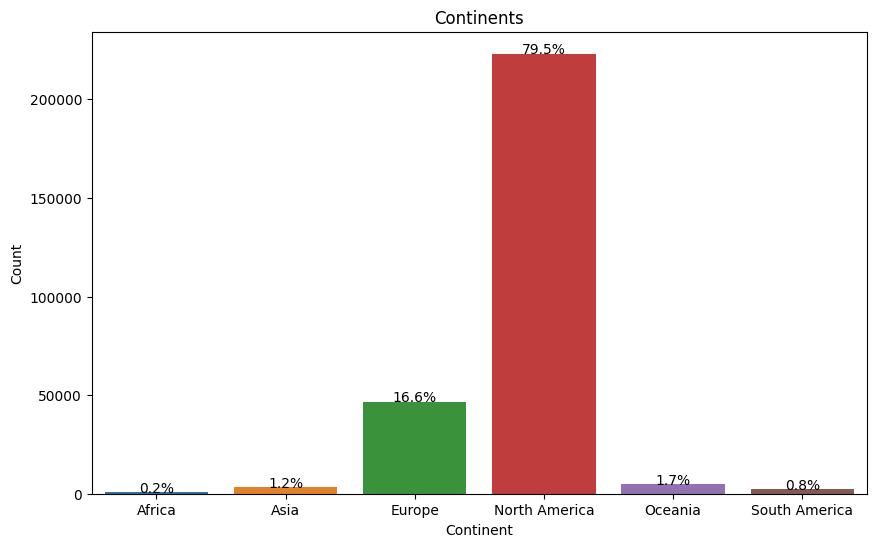

In [82]:
# Computation of percentages of continents
continent_counts = new_df_beers["continent"].value_counts().sort_index()
total_count = continent_counts.sum()
continent_percentages = (continent_counts / total_count) * 100

# DataFrame for the plot
plot_df = pd.DataFrame({
    'Continent': continent_counts.index,
    'Count': continent_counts.values,
    'Percentage': continent_percentages.values
})

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Count
sns.barplot(
    x='Continent', y='Count', data=plot_df, ax=ax, color='orange', label="Count", palette="tab10", hue="Continent"
)

# Percentages
for index, row in plot_df.iterrows():
    ax.text(index, row['Count'], f"{row['Percentage']:.1f}%", color='black', ha="center")

# Titles 
ax.set_title("Continents")
ax.set_ylabel("Count")
ax.set_xlabel("Continent");

# Ratings and beers exploration

In [5]:
new_df_ratings = pd.read_csv("../generated/data/new_ratings.csv")
new_df_beers = pd.read_csv("../generated/data/new_beers.csv")

In [6]:
model = smf.ols("rating ~ appearance + aroma + palate + taste + overall - 1", new_df_ratings, ).fit()
display(model.summary())
print("Sum of parameters : ", model.params.sum())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.368e+11
Date:                Sat, 09 Nov 2024   Prob (F-statistic):                        0.00
Time:                        10:30:01   Log-Likelihood:                      3.0148e+06
No. Observations:              628427   AIC:                                 -6.030e+06
Df Residuals:                  628422   BIC:                                 -6.030e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
appearance     0.0601   5.19e-06   1.16e+04      0.000       0.060       0.060
aroma          0.2401    6.2e-06   3.87e+04      0.000       0.240       0.240
palate         0.1001    6.8e-06   1.47e+04      0.000       0.100       0.100
taste          0.4002   8.15e-06   4.91e+04      0.000       0.400       0.400
overall        0.1997   7.92e-06   2.52e+04      0.000       0.200       0.200
==============================================================================
Omnibus:                   129050.083   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229216.148
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                       3.231   Cond. No.                         33.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sum of parameters :  1.0002715597770524


# Par type et continent

In [7]:
new_df_ratings.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].agg({"rating":["mean","sem"]}).reset_index()

continent        type    rating          
                                   mean       sem
0          Africa         Ale  3.449818  0.043309
1          Africa       Lager  2.830405  0.018311
2          Africa       Other  3.242308  0.092692
3          Africa     Pilsner  3.302206  0.078367
4          Africa       Stout  3.411256  0.041033
5          Africa  Wheat Beer  3.546190  0.058923
6            Asia         Ale  3.697482  0.007966
7            Asia       Lager  2.789692  0.004697
8            Asia       Other  3.408293  0.015525
9            Asia     Pilsner  3.191262  0.015595
10           Asia       Stout  3.755873  0.009103
11           Asia  Wheat Beer  3.882838  0.010620
12         Europe         Ale  3.712443  0.001412
13         Europe       Lager  3.231507  0.002422
14         Europe       Other  3.832375  0.002285
15         Europe     Pilsner  3.390165  0.003225
16         Europe       Stout  3.937353  0.001929
17         Europe  Wheat Beer  3.974278  0.001957
18  North America         Ale  3.864638  0.001882
19  North America       Lager  2.798288  0.003302
20  North America       Other  3.526071  0.003899
21  North America     Pilsner  3.432483  0.007416
22  North America       Stout  4.039763  0.003352
23  North America  Wheat Beer  3.675690  0.004594
24        Oceania         Ale  3.512955  0.005277
25        Oceania       Lager  2.682667  0.008439
26        Oceania       Other  3.434138  0.014259
27        Oceania     Pilsner  3.429945  0.016462
28        Oceania       Stout  3.778525  0.008615
29        Oceania  Wheat Beer  3.350057  0.015209
30  South America         Ale  3.571355  0.012127
31  South America       Lager  2.801230  0.012872
32  South America       Other  3.429714  0.013991
33  South America     Pilsner  2.922781  0.022076
34  South America       Stout  3.682689  0.018578
35  South America  Wheat Beer  3.513219  0.019057

In [9]:
fig = px.bar(
    new_df_ratings.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].mean().reset_index(),
    x="type",
    y="rating",
    facet_row="continent",
    color="continent",
    title="Ratings Per Continent",
    error_y="rating"
)

fig.update_yaxes(range=[3, 5])

fig.update_yaxes(title_text="Continent", matches="y", showticklabels=True)

fig.update_layout(
    title={'text': "Ratings Per Continent", 'x': 0.5, 'xanchor': 'center'},
    margin=dict(t=50),
    showlegend=False
)

# fig.show()
fig.write_html("../generated/figures/style_continent_rating.html")

In [11]:
new_df_ratings

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,continent,type
0,0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,20/08/2015,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,Africa,Lager
1,1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,20/02/2009,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,Europe,Ale
2,2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,13/03/2006,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,Europe,Ale
3,3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,01/12/2004,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True,Europe,Ale
4,4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,30/08/2004,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,Europe,Ale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,MattyG85,mattyg85.497925,4.50,4.50,4.50,4.50,4.5,4.50,Poured from 500 ml bottle into a Surly Darknes...,True,Europe,Stout
999996,999996,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,ThinkAgain,thinkagain.640802,NaN,NaN,NaN,NaN,NaN,4.50,NaN,False,Europe,Stout
999997,999997,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,Kartoffeln,kartoffeln.571639,5.00,4.00,4.50,4.00,4.5,4.21,A: Pours an opaque black with a mocha head of ...,True,Europe,Stout
999998,999998,Imperial Stout,28248,Nøgne Ø - Det Kompromissløse Bryggeri A/S,7730,Russian Imperial Stout,9.0,15/01/2012,kelvarnsen,kelvarnsen.639972,NaN,NaN,NaN,NaN,NaN,4.00,NaN,False,Europe,Stout


# Calcul avg_computed

In [29]:
new_df_beers[new_df_beers['beer_id'] == 19590]

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,continent,type
24,24,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4,4,3.85,NaN,NaN,4.5,3.845,NaN,0,NaN,Europe,Ale


In [81]:
new_df_ratings.loc[new_df_ratings['beer_id'] == 19590,"rating"]

1    3.67
2    3.73
3    3.98
4    4.00
Name: rating, dtype: float64

In [80]:
new_df_ratings.loc[new_df_ratings['beer_id'] == 19590,["appearance","aroma","palate","taste","overall","rating"]]

,appearance,aroma,palate,taste,overall,rating
1,3.0,3.5,3.5,4.0,3.5,3.67
2,4.0,3.5,3.5,4.0,3.5,3.73
3,4.0,3.5,4.0,4.0,4.5,3.98
4,4.0,4.0,4.0,4.0,4.0,4.00


In [75]:
(np.mean(new_df_ratings.loc[new_df_ratings['beer_id'] == 19590,["appearance","aroma","palate","taste","overall"]].values,0) *  model.params.values).sum()

3.846003986648621

In [72]:
new_df_beers

,Unnamed: 0,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,continent,type
0,0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Asia,Lager
1,1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Asia,Lager
2,2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Asia,Lager
3,3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Asia,Lager
4,4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Asia,Lager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN,North America,NaN
280819,280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN,North America,Ale
280820,280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,North America,NaN
280821,280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN,North America,NaN


In [2]:
rb_users = pd.read_csv("../data/processed/new_rb_users.csv")

In [14]:
rb_users.country.value_counts() / rb_users.country.value_counts().sum()

country
United States       0.530815
Canada              0.064338
England             0.054040
Poland              0.033622
Australia           0.029175
                      ...   
Honduras            0.000020
Falkland Islands    0.000020
Kyrgyzstan          0.000020
Papua New Guinea    0.000020
Tibet               0.000020
Name: count, Length: 173, dtype: float64

In [11]:
ba_users = pd.read_csv("../data/processed/new_ba_users.csv")

In [16]:
ba_users.country.value_counts() / ba_users.country.value_counts().sum()

country
United States                               0.924836
Canada                                      0.027151
England                                     0.006461
Australia                                   0.004247
Germany                                     0.003039
                                              ...   
South Georgia and South Sandwich Islands    0.000008
Angola                                      0.000008
Kazakhstan                                  0.000008
Egypt                                       0.000008
Sint Maarten                                0.000008
Name: count, Length: 145, dtype: float64

# BeerAdvocate : beers.csv 

In [13]:
DATA_FOLDER = '../data/beer_dataset/'
BEER_ADVOCATE_FOLDER = DATA_FOLDER + 'BeerAdvocate/' #BA

BA_BEERS_DATASET = BEER_ADVOCATE_FOLDER + "beers.csv"
ba_beers = pd.read_csv(BA_BEERS_DATASET)

In [43]:
#Descriptive statisctics

numerical_columns = ['nbr_ratings', 'nbr_reviews','avg_computed', 'ba_score', 'bros_score', 'abv', 'avg_computed']

descriptive_stats = ba_beers[numerical_columns].describe()

modes = ba_beers[numerical_columns].mode().iloc[0]  # Get the first mode

descriptive_stats.loc['mode'] = modes

print("\nDescriptive Statistics including Mode:")
print(descriptive_stats)


Descriptive Statistics including Mode:
         nbr_ratings    nbr_reviews   avg_computed      ba_score   bros_score  \
count  280823.000000  280823.000000  247982.000000  61200.000000  5702.000000   
mean       29.887267       9.221417       3.717594     84.633284    84.806559   
std       231.010063      68.866445       0.464248      4.052723    10.507735   
min         0.000000       0.000000       1.000000     46.000000    31.000000   
25%         1.000000       0.000000       3.500000     83.000000    81.000000   
50%         2.000000       1.000000       3.770000     85.000000    87.000000   
75%         8.000000       2.000000       4.000000     86.000000    91.000000   
max     16509.000000    3899.000000       5.000000    100.000000   100.000000   
mode        1.000000       0.000000       4.000000     85.000000    90.000000   

                 abv   avg_computed  
count  244799.000000  247982.000000  
mean        6.491370       3.717594  
std         2.054071       0.464248

Pearson correlation between ba_score and bros_score: 0.70
P-value: 0.00e+00


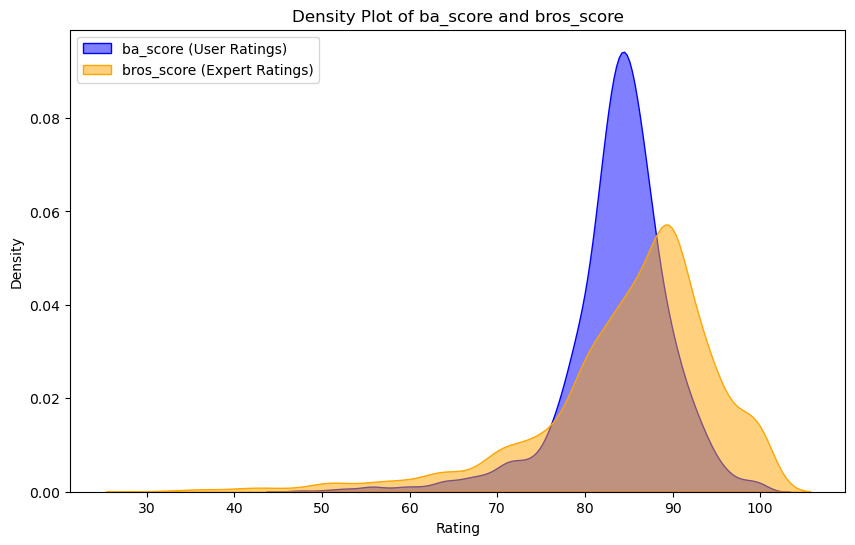

In [17]:
from scipy.stats import pearsonr
ba_beers_babro = ba_beers.dropna(subset=['ba_score', 'bros_score'])

# Calculate the Pearson correlation between ba_score and bros_score
correlation, p_value = pearsonr(ba_beers_babro['ba_score'], ba_beers_babro['bros_score'])
print(f"Pearson correlation between ba_score and bros_score: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

plt.figure(figsize=(10, 6))
sns.kdeplot(ba_beers_babro['ba_score'], label='ba_score (User Ratings)', fill=True, color="blue", alpha=0.5)
sns.kdeplot(ba_beers_babro['bros_score'], label='bros_score (Expert Ratings)', fill=True, color="orange", alpha=0.5)
plt.title("Density Plot of ba_score and bros_score")
plt.xlabel("Rating")
plt.legend()
plt.show()

/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_4174/4155231825.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")


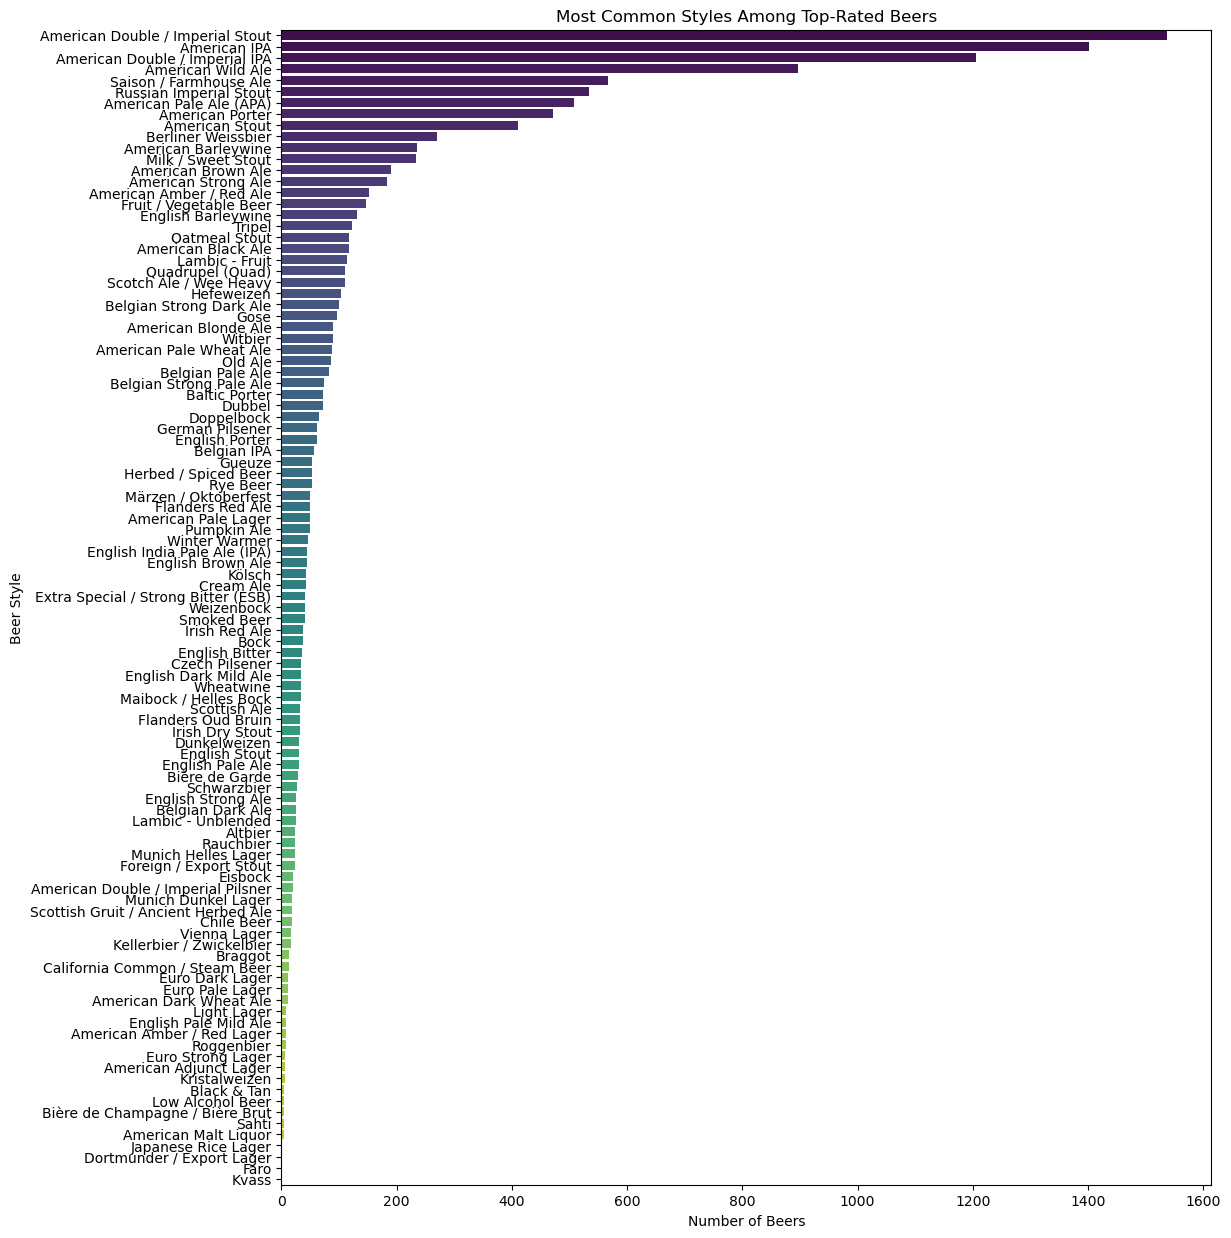


Top 5% Most Common Styles:
 style
American Double / Imperial Stout    1537
American IPA                        1401
American Double / Imperial IPA      1205
American Wild Ale                    896
Saison / Farmhouse Ale               567
Russian Imperial Stout               534
American Pale Ale (APA)              508
American Porter                      472
American Stout                       411
Berliner Weissbier                   271
Name: count, dtype: int64


In [27]:
#The code identifies the top 5% of beers by setting a rating threshold (top_rated_threshold). 
top_rated_threshold = ba_beers['avg_computed'].quantile(0.95)
top_beers = ba_beers[ba_beers['avg_computed'] >= top_rated_threshold]

style_counts = top_beers['style'].value_counts()

plt.figure(figsize=(12, 15))
sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")
plt.title("Most Common Styles Among Top-Rated Beers")
plt.xlabel("Number of Beers")
plt.ylabel("Beer Style")
plt.show()

print("\nTop 5% Most Common Styles:\n", style_counts.head(10))


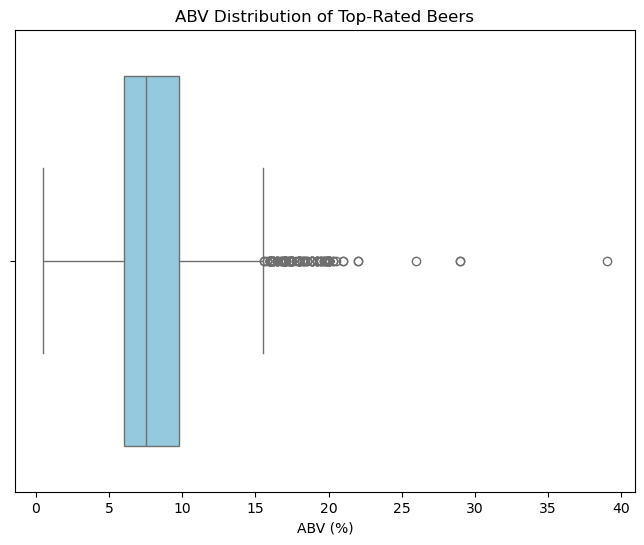

In [28]:
# alcohol analysis
abv_stats = top_beers['abv'].describe()
plt.figure(figsize=(8, 6))
sns.boxplot(x=top_beers['abv'], color="skyblue")
plt.title("ABV Distribution of Top-Rated Beers")
plt.xlabel("ABV (%)")
plt.show()

/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_4174/2340115945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ba_beers_cleaned_nona, x='avg', y='style', order=style_avg_ratings.index, palette="coolwarm")


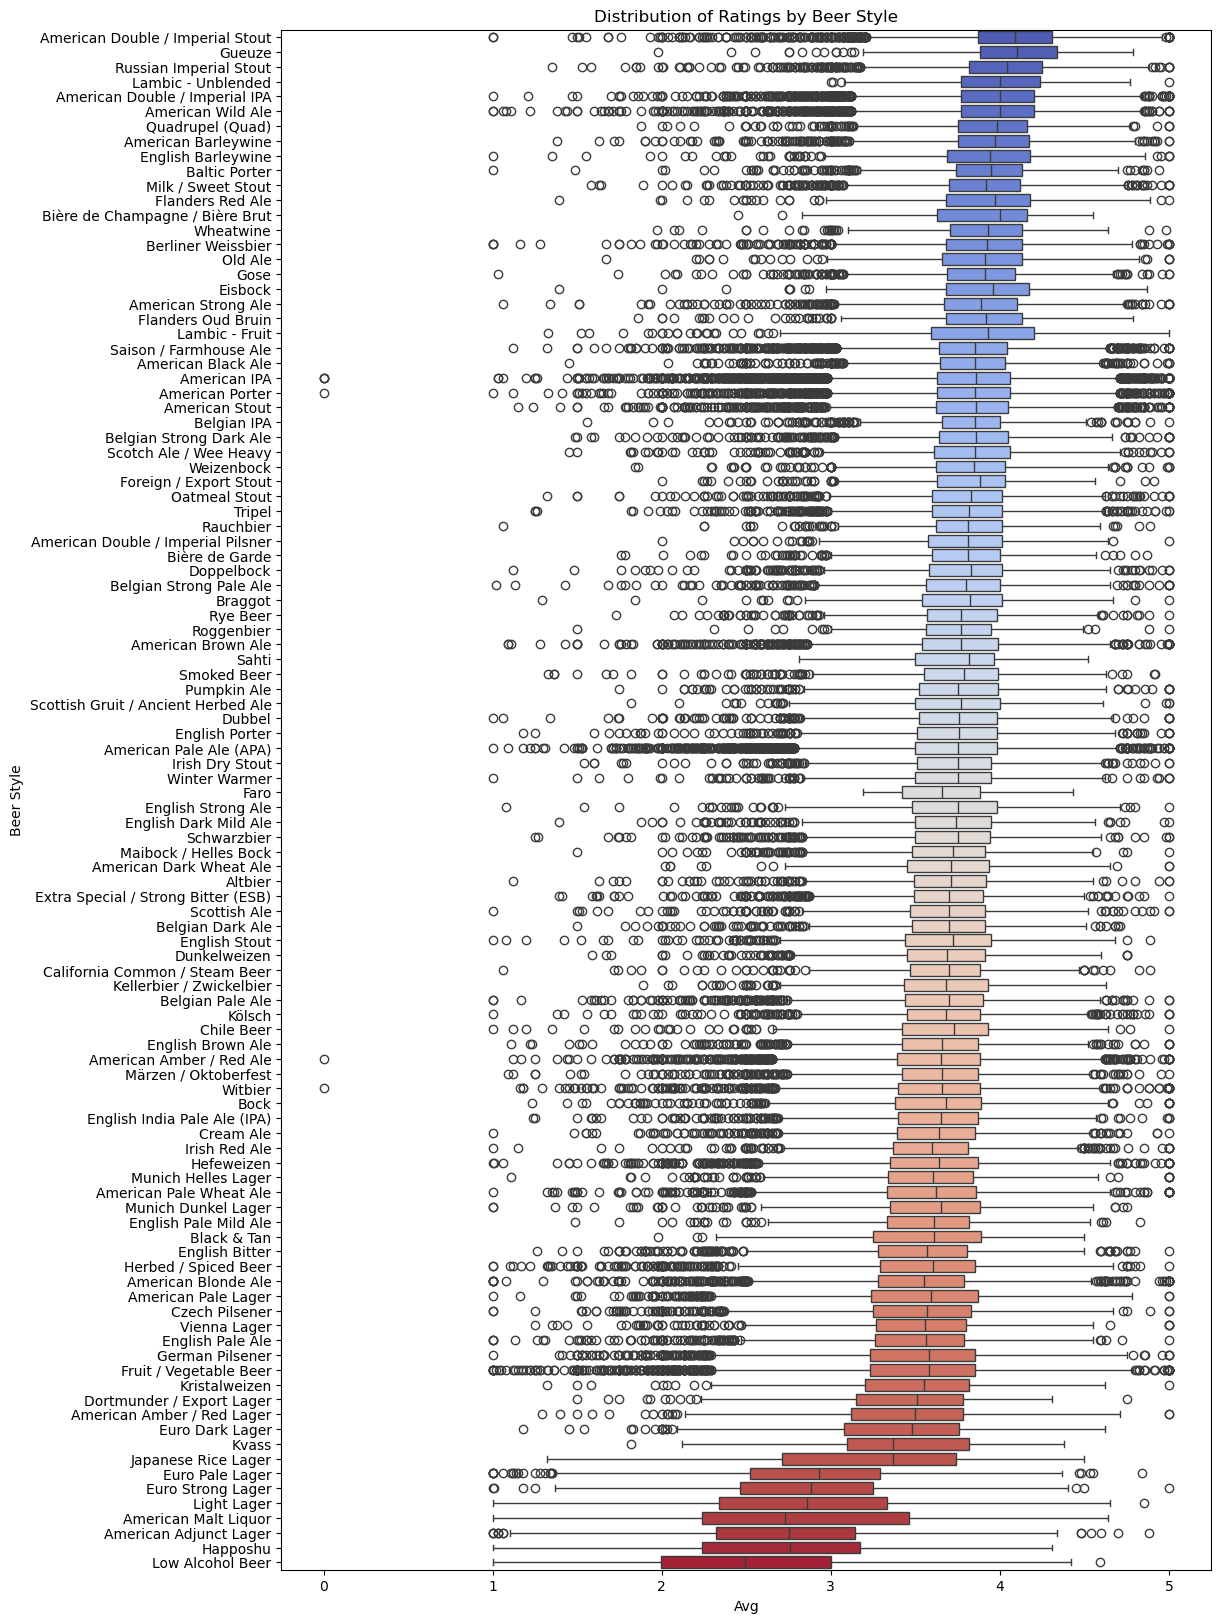

In [32]:
ba_beers_cleaned_nona = ba_beers_cleaned.dropna(subset=['style', 'avg_computed'])

# Calculate the average ratings by style
style_avg_ratings = ba_beers_cleaned_nona.groupby('style')['avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 20))
sns.boxplot(data=ba_beers_cleaned_nona, x='avg', y='style', order=style_avg_ratings.index, palette="coolwarm")
plt.title("Distribution of Ratings by Beer Style")
plt.xlabel("Avg")
plt.ylabel("Beer Style")
plt.show()

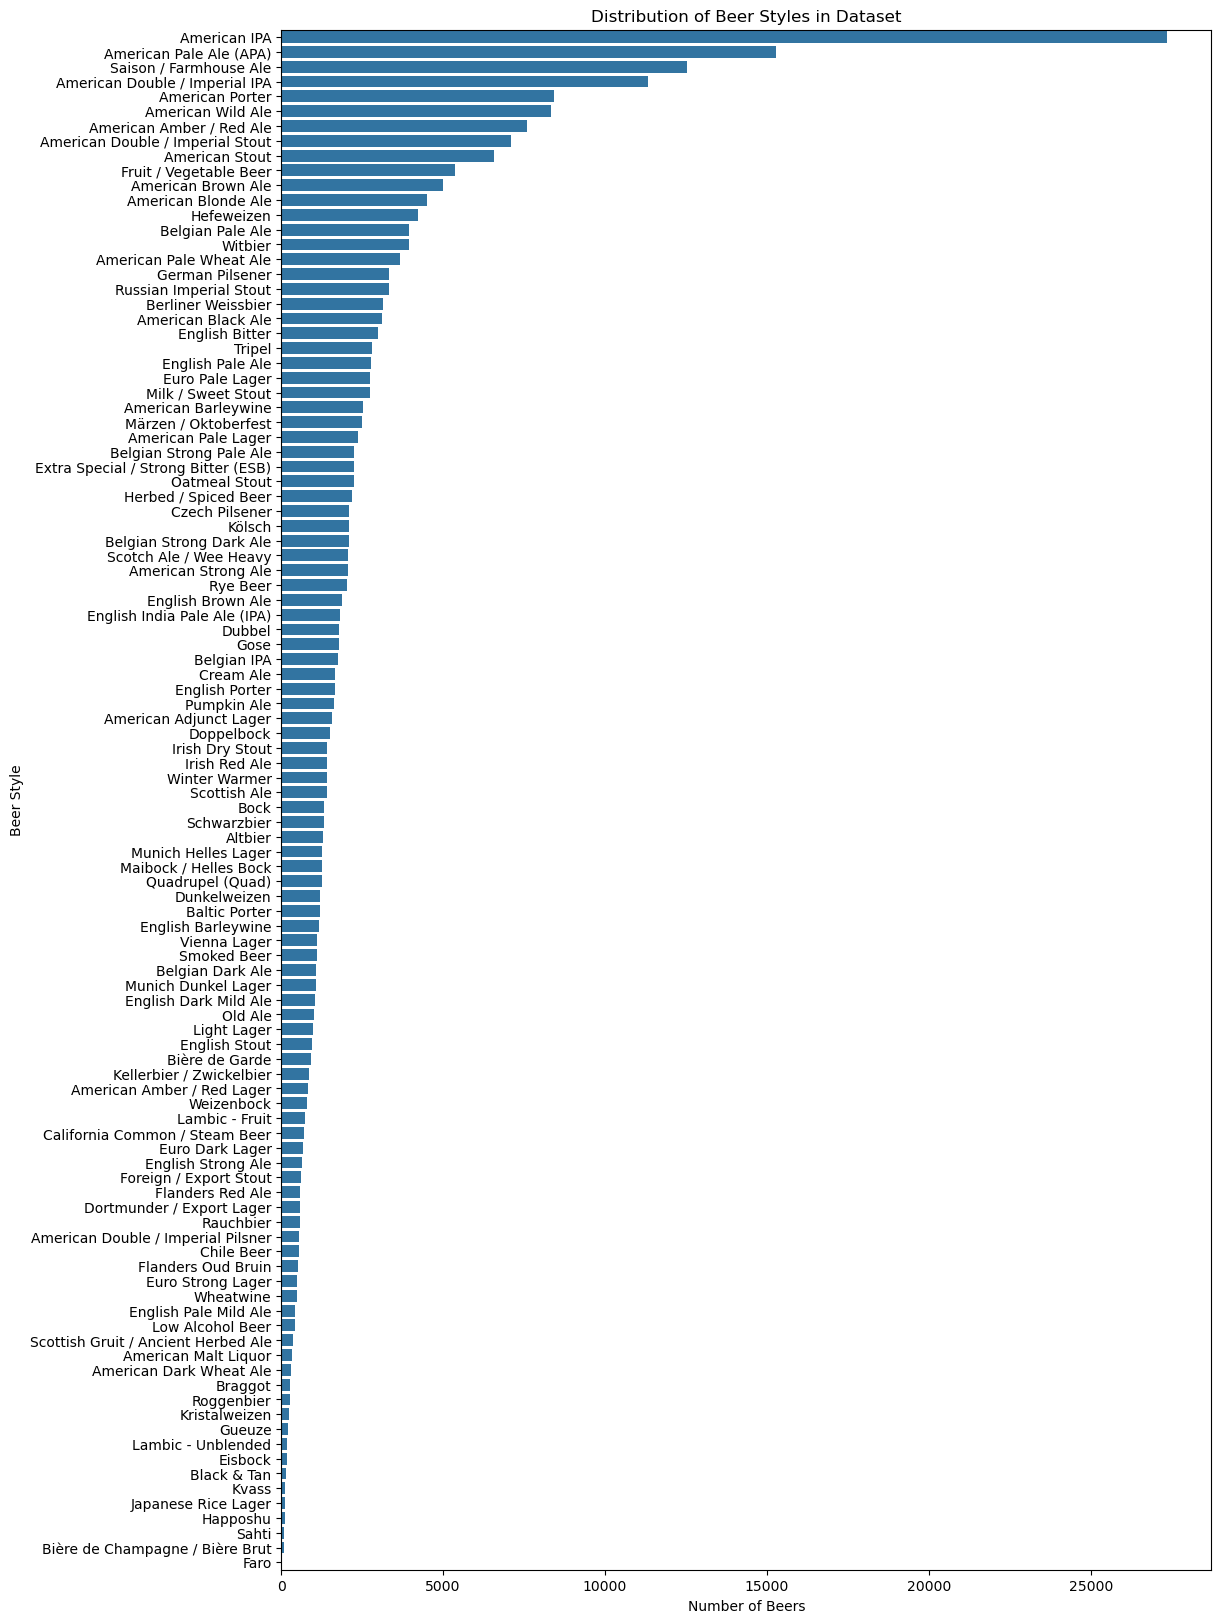

Top 10 Most Common Beer Styles:
 style
American IPA                        27355
American Pale Ale (APA)             15271
Saison / Farmhouse Ale              12522
American Double / Imperial IPA      11331
American Porter                      8410
American Wild Ale                    8326
American Amber / Red Ale             7602
American Double / Imperial Stout     7084
American Stout                       6577
Fruit / Vegetable Beer               5377
Name: count, dtype: int64


In [33]:
style_counts = ba_beers_cleaned['style'].value_counts()

# Visualize the distribution of beer styles
plt.figure(figsize=(12, 20))
sns.barplot(x=style_counts.values, y=style_counts.index)
plt.title("Distribution of Beer Styles in Dataset")
plt.xlabel("Number of Beers")
plt.ylabel("Beer Style")
plt.show()

print("Top 10 Most Common Beer Styles:\n", style_counts.head(10))


In [34]:
#Identify breweries with the highest avg scores or nbr_ratings
ba_brewery = ba_beers.dropna(subset=['brewery_name', 'avg_computed', 'nbr_ratings'])

brewery_stats = ba_brewery.groupby('brewery_name').agg(
    avg_score=('avg_computed', 'mean'),
    total_ratings=('nbr_ratings', 'sum')
).reset_index()

top_breweries_by_score = brewery_stats.sort_values(by='avg_score', ascending=False).head(10)

# trouver top 10 breweries by total number of ratings
top_breweries_by_ratings = brewery_stats.sort_values(by='total_ratings', ascending=False).head(10)

print("Top 10 Breweries by Average Score:")
print(top_breweries_by_score)

print("\nTop 10 Breweries by Number of Ratings:")
print(top_breweries_by_ratings)


Top 10 Breweries by Average Score:
                         brewery_name  avg_score  total_ratings
73                   3 Stakes Brewing     5.0000              8
4761  Dosbous Ribargozana de Cervezas     5.0000              1
2813              Brother Ass Brewing     5.0000              1
1685           Blasta Brewing Company     4.9600              1
5387      Flying Dodo Brewing Company     4.9500              1
4800             Draughtsmen Aleworks     4.9450              2
8238       McMenamins On The Columbia     4.9400              1
7763           Little Bang Brewing Co     4.9100              1
2190               Brasserie Solstice     4.8975              8
8553               MoonRidge Brew Pub     4.8950              2

Top 10 Breweries by Number of Ratings:
                             brewery_name  avg_score  total_ratings
11437                       Stone Brewing   3.947895         165752
10962           Sierra Nevada Brewing Co.   3.882140         165465
5464             

In [42]:
#Count the unique styles each brewery produces (maybe see if breweries 
#with broader style offerings have higher scores.)

# Count unique styles per brewery and calculate average score
brewery_style_stats = ba_brewery.groupby('brewery_name').agg(
    num_styles=('style', 'nunique')   
).reset_index()

brewery_style_stats = brewery_style_stats.sort_values(by='num_styles', ascending=False)

print("Breweries with Broad Style Offerings ")
print(brewery_style_stats.head(10))


Breweries with Broad Style Offerings 
                                 brewery_name  num_styles
10389        Rock Bottom Restaurant & Brewery          89
6842           Iron Hill Brewery & Restaurant          89
5836                    Goose Island Beer Co.          85
6989       John Harvard's Brewery & Ale House          84
4051                       Cigar City Brewing          81
1870       Boston Beer Company (Samuel Adams)          81
10927                 Short's Brewing Company          77
241    Against The Grain Brewery & Smokehouse          77
10962               Sierra Nevada Brewing Co.          76
8445            Minneapolis Town Hall Brewery          76


Pearson correlation between nbr_reviews and avg score: 0.03
P-value: 8.12e-51


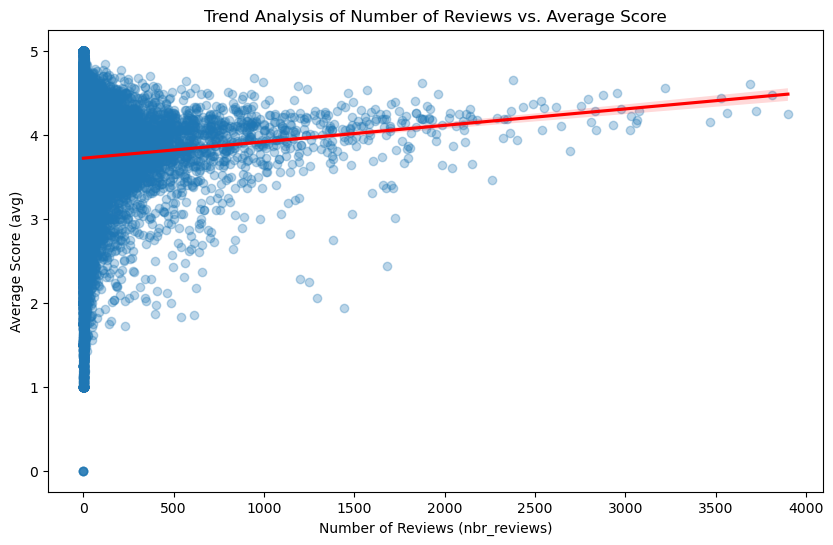

In [41]:
#Investigate if beers with more nbr_reviews tend to have higher or lower avg scores. 

df = ba_beers_cleaned.dropna(subset=['nbr_reviews', 'avg_computed'])

# Calculate the Pearson correlation between nbr_reviews and avg score
correlation, p_value = pearsonr(df['nbr_reviews'], df['avg'])
print(f"Pearson correlation between nbr_reviews and avg score: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

plt.figure(figsize=(10, 6))
sns.regplot(x='nbr_reviews', y='avg', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Trend Analysis of Number of Reviews vs. Average Score")
plt.xlabel("Number of Reviews (nbr_reviews)")
plt.ylabel("Average Score (avg)")
plt.show()


Average Number of Reviews per Style:
                     style  avg_nbr_reviews
0                   Gueuze        52.497462
1                     Faro        30.178571
2   Russian Imperial Stout        24.313838
3  Belgian Strong Dark Ale        24.010077
4   American Adjunct Lager        23.353055
5         Quadrupel (Quad)        23.278715
6           Lambic - Fruit        23.160167
7                  Old Ale        21.291462
8                  Eisbock        20.957576
9              Black & Tan        20.360902


/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_4174/1669601704.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=style_avg_reviews.head(10), x='avg_nbr_reviews', y='style', palette="magma")


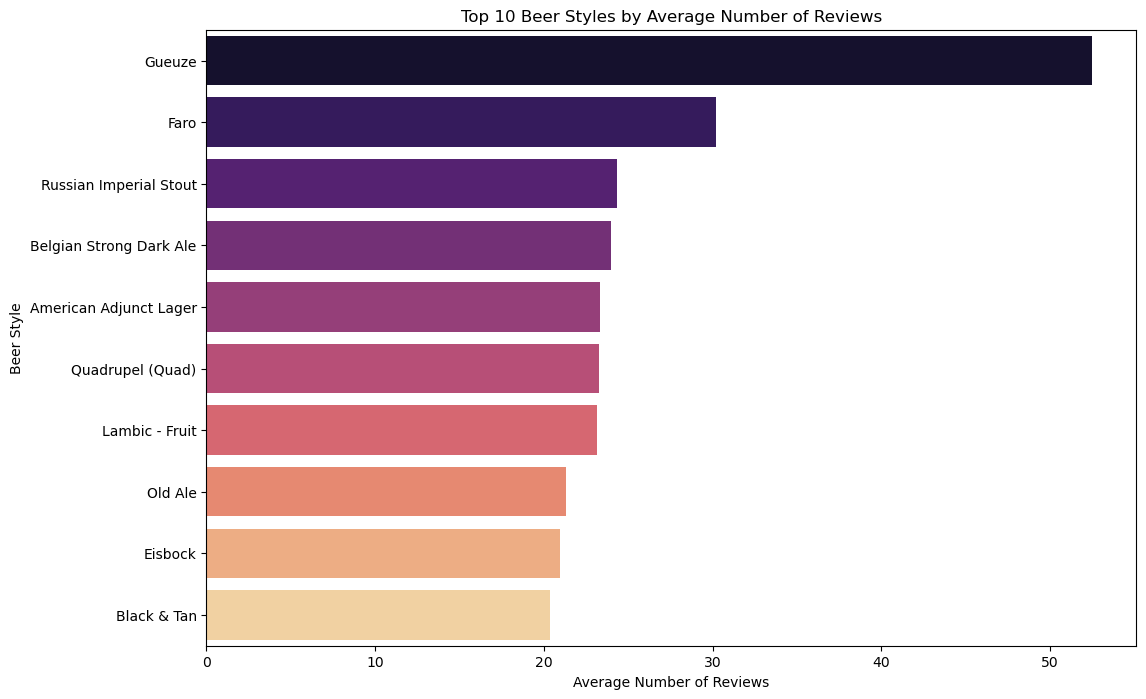

In [38]:
#Investigate average number of review per style (to see later if beers with more nbr_reviews tend to have higher or lower avg scores)
ba_nbr_style = ba_beers_cleaned.dropna(subset=['style', 'nbr_reviews'])

style_avg_reviews = ba_nbr_style.groupby('style')['nbr_reviews'].mean().sort_values(ascending=False).reset_index()

style_avg_reviews.columns = ['style', 'avg_nbr_reviews']

print("Average Number of Reviews per Style:")
print(style_avg_reviews.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(data=style_avg_reviews.head(10), x='avg_nbr_reviews', y='style', palette="magma")
plt.title("Top 10 Beer Styles by Average Number of Reviews")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Beer Style")
plt.show()